<a href="https://colab.research.google.com/github/filipnedeljkov97/Pyhton-projects/blob/main/Projects/Fatal_Force/Data/Fatal_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.


### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 24.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [2]:
%pip install iso3166

## Import Statements

In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

from collections import Counter
import us
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor



In [5]:
%pip install us


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.8 MB/s eta 0:00:00
  Created wheel for us: filename=us-3.1.1-py3-none-any.whl size=12547 sha256=37aaee12ce5ba10d363b0b399222e397c81bfaa3a85e45e4aafd42eee2072297
  Stored in directory: /root/.cache/pip/wheels/da/f9/64/9669135a7ce533faf78e3b32259c505f964f03b069be6844f8
Successfully built us
  Attempting uninstall: jellyfish
    Found existing installation: jellyfish 1.0.3
    Uninstalling jellyfish-1.0.3:
      Successfully uninstalled jellyfish-1.0.3


## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")
df_demographics = pd.read_csv('state_demographics.csv', usecols = ['State','Ethnicities.White Alone', 'Ethnicities.Black Alone', 'Ethnicities.American Indian and Alaska Native Alone', 'Ethnicities.Asian Alone', 'Ethnicities.Native Hawaiian and Other Pacific Islander Alone', 'Ethnicities.Two or More Races'])
df_fatal_police_shootings = pd.read_csv('fatal-police-shootings-data.csv', encoding="windows-1252")
df_population_1910_2020 = pd.read_csv('population_1910_2020.csv')

# Preliminary Data Exploration

* Shape of the DataFrames
* The column names
* NaN values or duplicates

In [ ]:
print(f'Shape of Median HouseHold Income {df_hh_income.shape}')
print(f'Shape of Pct People Below Poverty Level {df_pct_poverty.shape}')
print(f'Shape of Completed High School {df_pct_completed_hs.shape}')
print(f'Shape of Share of Race By City {df_share_race_city.shape}')
print(f'Shape of Death by Police in US {df_fatalities.shape}')

Shape of Median HouseHold Income (29322, 3)
Shape of Pct People Below Poverty Level (29329, 3)
Shape of Completed High School (29329, 3)
Shape of Share of Race By City (29268, 7)
Shape of Death by Police in US (2535, 14)


In [ ]:
print(f'Columns of Median HouseHold Income {df_hh_income.columns}\n')
print(f'Columns of Pct People Below Poverty Level {df_pct_poverty.columns}\n')
print(f'Columns of Completed High School {df_pct_completed_hs.columns}\n')
print(f'Columns of Share of Race By City {df_share_race_city.columns}\n')
print(f'Columns of Death by Police in US {df_fatalities.columns}\n')

Columns of Median HouseHold Income Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

Columns of Pct People Below Poverty Level Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

Columns of Completed High School Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

Columns of Share of Race By City Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

Columns of Death by Police in US Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')



## Data Cleaning - Check for Missing Values and Duplicates


In [ ]:
print(df_hh_income.isna().values.any())
print(df_hh_income.duplicated().values.any())

True
False


In [ ]:
df_hh_income.isna().any(axis=0)

Geographic Area    False
City               False
Median Income       True
dtype: bool

In [ ]:
df_hh_income['Median Income'].isna().value_counts()

Median Income
False    29271
True        51
Name: count, dtype: int64

In [ ]:
df_hh_income.fillna(0, inplace=True)

In [ ]:
print(df_fatalities.isna().values.any())
print(df_fatalities.duplicated().values.any())

True
False


In [ ]:
df_fatalities.isna().any(axis=0)

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool

In [ ]:
df_fatalities.fillna(0, inplace=True)

In [ ]:
print(df_pct_completed_hs.isna().values.any())
print(df_pct_completed_hs.duplicated().values.any())

False
False


In [ ]:
print(df_pct_poverty.isna().values.any())
print(df_pct_poverty.duplicated().values.any())

False
False


In [ ]:
print(df_share_race_city.isna().values.any())
print(df_share_race_city.duplicated().values.any())

False
False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [ ]:
df_pct_poverty.dtypes

Geographic Area     object
City                object
poverty_rate       float64
dtype: object

In [ ]:
df_pct_poverty[df_pct_poverty['poverty_rate'].str.contains('-')]


,Geographic Area,City,poverty_rate
573,AL,Whatley CDP,-
608,AK,Attu Station CDP,-
632,AK,Chicken CDP,-
637,AK,Chisana CDP,-
662,AK,Dot Lake CDP,-
...,...,...,...
29261,WY,Oakley CDP,-
29266,WY,Owl Creek CDP,-
29273,WY,Powder River CDP,-
29289,WY,Ryan Park CDP,-


In [ ]:
df_pct_poverty['poverty_rate']=pd.to_numeric(df_pct_poverty['poverty_rate'], errors = 'coerce')


In [ ]:
df_pct_poverty_clean = df_pct_poverty.dropna()

In [ ]:
average_poverty_states = df_pct_poverty_clean.groupby('Geographic Area', as_index=False).agg({'poverty_rate': 'mean'})


In [ ]:
average_poverty_states.columns = ['Geographic Area', 'Average Poverty Rate']

In [ ]:
average_poverty_states.head()

,Geographic Area,Average Poverty Rate,State Name
31,NJ,8.19,New Jersey
6,CT,9.14,Connecticut
19,MA,9.59,Massachusetts
50,WY,9.89,Wyoming
20,MD,10.31,Maryland


In [ ]:
def iso_to_full_name(iso_name):
    return us.states.lookup(iso_name).name if us.states.lookup(iso_name) else None
average_poverty_states['State Name']= average_poverty_states['Geographic Area'].apply(iso_to_full_name)

In [ ]:
average_poverty_states.sort_values('Average Poverty Rate', ascending=True, inplace=True)

In [ ]:
average_poverty_states.loc[average_poverty_states['Geographic Area'].str.contains('DC'), 'State Name'] ='Washington DC'

In [ ]:
plt.figure(figsize=(50, 100))
h_bar = px.bar(y= average_poverty_states['Average Poverty Rate'],
               x= average_poverty_states['State Name'],
               color=average_poverty_states['Average Poverty Rate'],
               color_continuous_scale='Viridis',
               title='Poverty Rate in each US State')
h_bar.update_layout(xaxis_title='US State', yaxis_title='Poverty Percent', xaxis=dict(tickangle=-45,tickfont=dict(size=12)))
h_bar.show()

<Figure size 5000x10000 with 0 Axes>

# Chart the High School Graduation Rate by US State

The High School Graduation Rate in ascending order of US States

In [ ]:
df_pct_completed_hs[~df_pct_completed_hs['percent_completed_hs'].str.contains('-')]


,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [ ]:
df_pct_completed_hs[df_pct_completed_hs['percent_completed_hs'].str.contains('-')]
df_pct_completed_hs['percent_completed_hs']=pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors = 'coerce')


In [ ]:
df_pct_completed_hs_clean = df_pct_completed_hs.dropna()

In [ ]:
df_pct_completed_hs_clean.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.20
1,AL,Abbeville city,69.10
2,AL,Adamsville city,78.90
3,AL,Addison town,81.40
4,AL,Akron town,68.60


In [ ]:
average_graduation_by_state = df_pct_completed_hs_clean.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs': 'mean'})
average_graduation_by_state.columns = ['Geographic Area', 'Graduation Rate']
average_graduation_by_state.sort_values('Graduation Rate', ascending = True, inplace = True)
def iso_to_full_name(iso_name):
    return us.states.lookup(iso_name).name if us.states.lookup(iso_name) else None
average_graduation_by_state['State Name']= average_graduation_by_state['Geographic Area'].apply(iso_to_full_name)
average_graduation_by_state.loc[average_graduation_by_state['Geographic Area'].str.contains('DC'), 'State Name'] ='Washington DC'

In [ ]:
average_graduation_by_state.count()

Geographic Area    51
Graduation Rate    51
State Name         51
dtype: int64

In [ ]:
bar = px.bar(x=average_graduation_by_state['State Name'],
             y= average_graduation_by_state['Graduation Rate'],
             title = 'Graduation Rate in each US State',
             color=average_graduation_by_state['Graduation Rate'],
             color_continuous_scale='Aggrnyl')
bar.update_layout(xaxis_title='US State',
                  coloraxis_showscale=True,
                  yaxis_title='Graduation Percent %',
                  xaxis=dict(tickangle=-45, tickfont=dict(size=12))
                  )
bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
merge_df_relationship = pd.merge(average_graduation_by_state, average_poverty_states, on = ['State Name', 'Geographic Area'])

In [ ]:
merge_df_relationship.head(10)

,Geographic Area,Graduation Rate,State Name,Average Poverty Rate
0,TX,75.69,Texas,19.92
1,MS,78.47,Mississippi,26.88
2,GA,79.01,Georgia,23.78
3,LA,79.29,Louisiana,22.34
4,AR,79.95,Arkansas,22.96
5,AL,80.30,Alabama,20.65
6,AZ,80.47,Arizona,25.67
7,SC,80.85,South Carolina,22.16
8,NM,80.98,New Mexico,23.08
9,TN,81.63,Tennessee,19.89


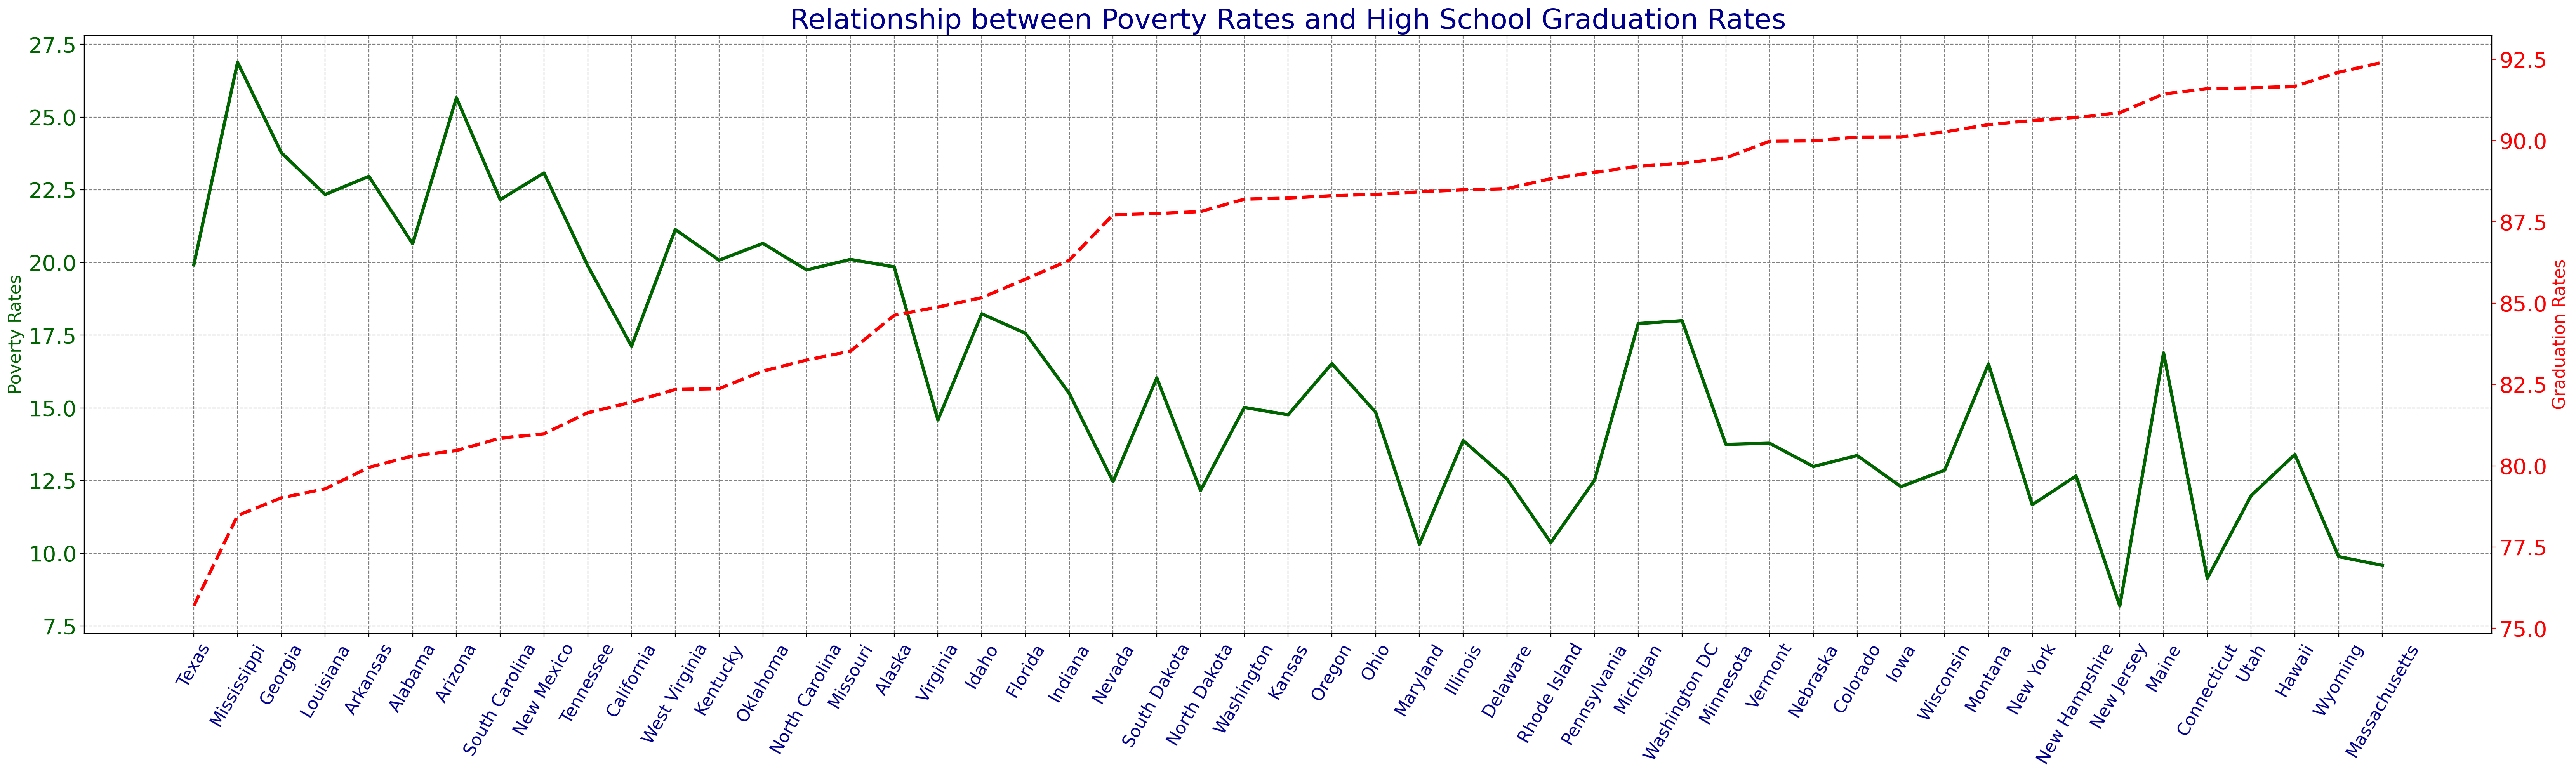

In [ ]:
plt.figure(figsize=(40, 10), dpi=200)
plt.xticks(fontsize=16, rotation=60, color ='darkblue')
plt.yticks(fontsize=20, color = 'darkgreen')
plt.title('Relationship between Poverty Rates and High School Graduation Rates', fontsize=26, color='darkblue')
ax1= plt.gca()
ax2= ax1.twinx()

ax1.set_ylabel('Poverty Rates', fontsize=16, color='darkgreen')
ax2.set_ylabel('Graduation Rates', fontsize=16, color='red')
ax1.grid(color='grey', linestyle='--')
ax2.tick_params(axis='y', labelsize=20, colors='red')



ax1.plot(merge_df_relationship['State Name'], merge_df_relationship['Average Poverty Rate'], linewidth=3, color='darkgreen')
ax2.plot(merge_df_relationship['State Name'], merge_df_relationship['Graduation Rate'], linewidth=3, color='red', linestyle ='--')
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

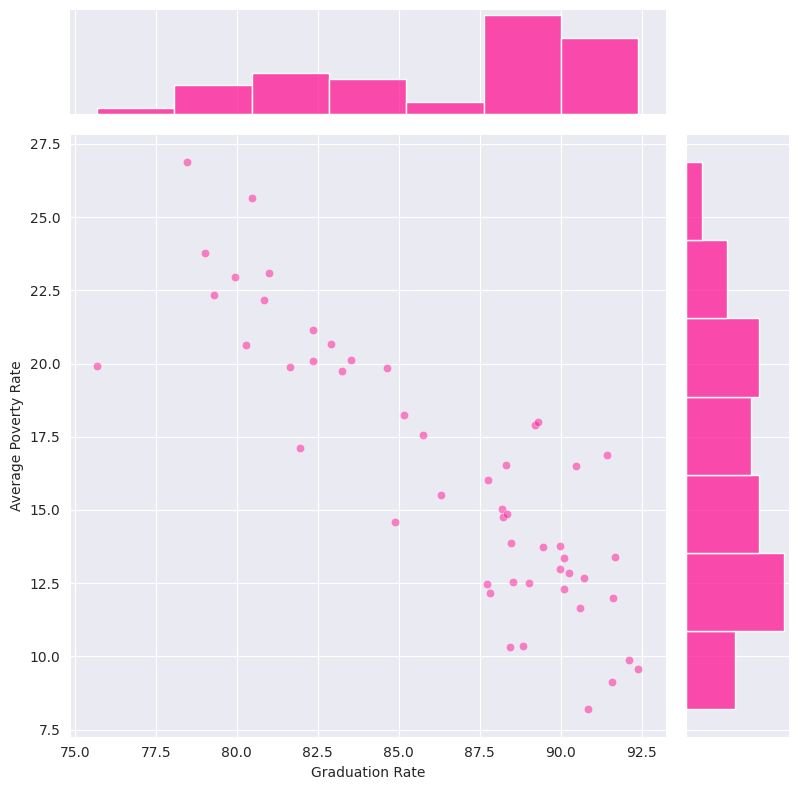

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=merge_df_relationship['Graduation Rate'],
                y=merge_df_relationship['Average Poverty Rate'],
                height=8,
                kind='scatter',
                color='deeppink',
                joint_kws={'alpha':0.5})

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

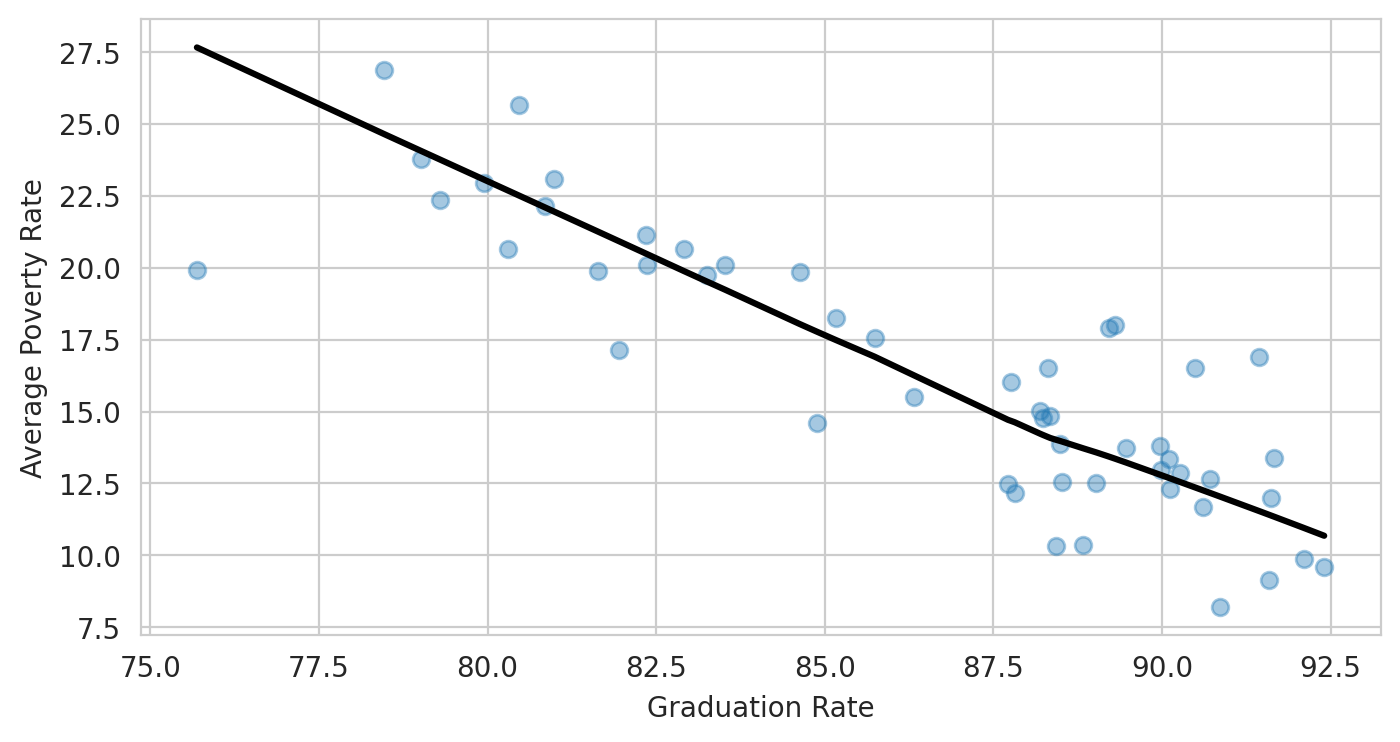

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=merge_df_relationship,
                x='Graduation Rate',
                y='Average Poverty Rate',
                lowess=True,
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
df_demographics.dtypes

State                                                            object
Ethnicities.White Alone                                         float64
Ethnicities.Black Alone                                         float64
Ethnicities.American Indian and Alaska Native Alone             float64
Ethnicities.Asian Alone                                         float64
Ethnicities.Native Hawaiian and Other Pacific Islander Alone    float64
Ethnicities.Two or More Races                                   float64
dtype: object

In [ ]:
df_demographics['Native']= df_demographics['Ethnicities.American Indian and Alaska Native Alone']+df_demographics['Ethnicities.Native Hawaiian and Other Pacific Islander Alone']

In [ ]:
df_demographics.drop('Ethnicities.American Indian and Alaska Native Alone', axis=1, inplace=True)
df_demographics.drop('Ethnicities.Native Hawaiian and Other Pacific Islander Alone', axis=1, inplace=True)


In [ ]:
df_demographics.columns = ['State', 'White', 'Black', 'Asian', 'Two or More Races', 'Native']

In [ ]:
df_demographics['Percent'] = df_demographics.White+df_demographics.Black+df_demographics.Asian+df_demographics['Two or More Races']+df_demographics.Native

In [ ]:
df_melted = pd.melt(df_demographics,
                    id_vars=['State'],
                    value_vars=['White', 'Black', 'Asian', 'Two or More Races', 'Native'],
                    var_name='Race',
                    value_name='Percentage')

fig = px.bar(df_melted,
             x='State',
             y='Percentage',
             color='Race',
             title='Racial Makeup of Each US State',
             barmode='stack'
             )

fig.update_xaxes(title='States of US')
fig.update_yaxes(title='Percentage %')

fig.show()

## Create Donut Chart by of People Killed by Race





In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
df_fatalities['race'].value_counts()

race
W    1201
B     618
H     423
0     195
A      39
N      31
O      28
Name: count, dtype: int64

In [ ]:
killed_races = df_fatalities['race'].value_counts()

In [ ]:
killed_races

White        1201
Black         618
Hispanic      423
Undefined     195
Asian          39
Native         31
Other          28
Name: count, dtype: int64

In [ ]:
killed_races.index =['White', 'Black', 'Hispanic', 'Undefined', 'Asian', 'Native', 'Other']


In [ ]:
fig = px.pie(labels=killed_races.index, values = killed_races.values, names = killed_races.index, hole =0.35)
fig.update_traces(textposition = 'inside', textfont_size=15, textinfo='percent')
fig.update_layout(
    title={
        'text': 'People Killed by Race',
        'font': {'size': 20, 'color' : 'darkblue'}
    }
)
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women


In [ ]:
death_men_women = df_fatalities['gender'].value_counts()

In [ ]:
death_men_women.index =['Male', 'Female']


In [ ]:
fig = px.pie(labels=death_men_women.index, values = death_men_women.values, names = death_men_women.index, hole =0.25)
fig.update_traces(textposition = 'inside', textfont_size=15, textinfo='percent')
fig.update_layout(
    title={
        'text': 'The Total Number of Deaths of Men and Women',
        'font': {'size': 20, 'color' : 'darkblue'}
    }
)
fig.show()

# Create a Box Plot Showing the Age and Manner of Death



In [ ]:
df_fatalities['manner_of_death'].value_counts()

manner_of_death
shot                2363
shot and Tasered     172
Name: count, dtype: int64

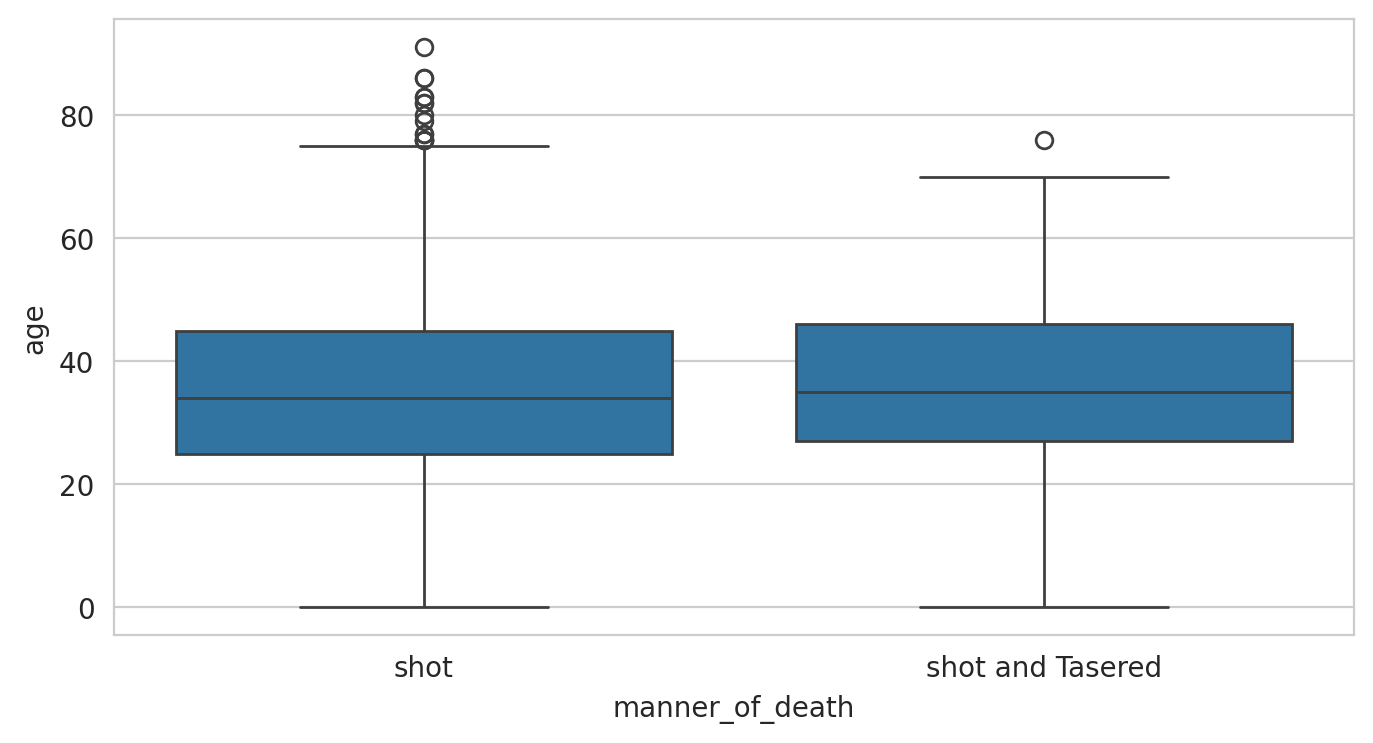

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_fatalities,
                y='age',
                x='manner_of_death',
                )

plt.show()

In [ ]:
death_men_manner = df_fatalities.loc[df_fatalities['gender']=='M']['manner_of_death'].value_counts()
death_women_manner = df_fatalities.loc[df_fatalities['gender']=='F']['manner_of_death'].value_counts()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Pie(labels=death_men_manner.index, values=death_men_manner.values, name='Men', hole=0.4, domain={'x': [0, 0.5]}))
fig.add_trace(go.Pie(labels=death_women_manner.index, values=death_women_manner.values, name='Women', hole=0.4, domain={'x': [0.5, 1]}))

fig.update_layout(title='Manner of Death Distribution (Men vs Women)', showlegend=True)

fig.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
df_fatalities['armed'].value_counts().head(12)

armed
gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
machete             18
0                    9
Taser                9
ax                   9
sword                8
Name: count, dtype: int64

In [ ]:
df_fatalities.loc[df_fatalities['armed']==0]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
615,743,Benjamin Peter Ashley,15/08/15,shot,0,34.00,M,B,Inyokern,CA,False,attack,Not fleeing,False
1551,1741,Jeffrey Smith,28/07/16,shot,0,47.00,M,B,La Quinta,CA,False,other,Car,False
1715,1926,Clayton Eugene Baker,30/09/16,shot,0,38.00,M,W,Groveton,TX,False,undetermined,Not fleeing,False
1732,1944,Larry Daniel Matthews,07/10/16,shot,0,57.00,M,B,Macon,GA,False,other,Not fleeing,False
1825,2037,TK TK,11/11/16,shot and Tasered,0,0.00,M,0,East Point,GA,False,undetermined,0,False
1975,2203,Gilbert Zambronio-Lovato,07/01/17,shot,0,38.00,M,H,Albuquerque,NM,False,other,Not fleeing,False
2145,2711,Jose Olivares,28/02/17,shot,0,43.00,M,0,Houma,LA,True,undetermined,Not fleeing,False
2469,2751,Brian Easley,07/07/17,shot,0,33.00,M,B,Marietta,GA,True,undetermined,Not fleeing,False
2487,2772,James Gerald Davis,12/07/17,shot,0,40.00,M,0,Lake View,SC,False,undetermined,0,False


In [ ]:
armed_df = pd.DataFrame({})

In [ ]:
armed=df_fatalities.loc[(df_fatalities['armed'] != 'unarmed') & (df_fatalities['armed'] != 0)].armed.value_counts().sum()
unarmed=df_fatalities.loc[(df_fatalities['armed'] == 'unarmed') & (df_fatalities['armed'] != 0)].armed.value_counts().sum()
armed_df = pd.DataFrame({'Deaths': [armed, unarmed]}, index=['Armed', 'Unarmed'])


In [ ]:
armed_df

,Deaths
Armed,2355
Unarmed,171


In [ ]:
fig = px.pie(labels=armed_df.index, values = armed_df['Deaths'], names = armed_df.index, hole =0.375)
fig.update_traces(textposition = 'inside', textfont_size=15, textinfo='percent')
fig.update_layout(
    title={
        'text': 'Percentage of Killed People who were Armed',
        'font': {'size': 20, 'color' : 'darkblue'}
    }
)
fig.show()

In [ ]:
top_10_carried_weapon = df_fatalities.loc[(df_fatalities['armed'] != 'unarmed') & (df_fatalities['armed'] != 0)]['armed'].value_counts()[:10]
top_10_carried_weapon.sort_values(ascending=True, inplace=True)

In [ ]:
top_10_carried_weapon

armed
sword                8
ax                   9
Taser                9
unknown weapon      18
machete             18
toy weapon         104
undetermined       117
vehicle            177
knife              373
gun               1398
Name: count, dtype: int64

In [ ]:
h_bar = px.bar(x = top_10_carried_weapon.values,
               y = top_10_carried_weapon.index,
               orientation='h',
               color = top_10_carried_weapon.values,
               color_continuous_scale='Viridis',
               title='Top 20 Carried Weapon')
h_bar.update_layout(xaxis_title='Number of Weapon', yaxis_title='Weapons', coloraxis_showscale=False)
h_bar.show()

In [ ]:
gun_vs_unarmed = df_fatalities.loc[(df_fatalities['armed'] == 'gun') | (df_fatalities['armed'] == 'unarmed')]['armed'].value_counts()

In [ ]:
total_killed = df_fatalities.armed.count()
total_killed
gun_vs_unarmed[0]

1398

In [ ]:
bar = px.bar(x=gun_vs_unarmed.index, y= gun_vs_unarmed.values, title = f'Gun vs Unarmed', color=gun_vs_unarmed.values, color_continuous_scale='Aggrnyl')
bar.update_layout(
                    coloraxis_showscale=False,
                    xaxis_title =f'People who were killed by gun {gun_vs_unarmed[0]} of total killed {total_killed}, People who were killed but were unarmed {gun_vs_unarmed[1]} of total killed {total_killed}',
                    yaxis_title='Number')
bar.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
age_len = len(df_fatalities.loc[df_fatalities.age != 0]['age'])
years_under_25 = len(df_fatalities.loc[(df_fatalities.age!=0) & (df_fatalities.age < 25)]['age'])

In [ ]:
percentage_25_years_under = years_under_25/age_len*100
print(f'Percentage of people killed who were under 25 years old: {percentage_25_years_under:.2f}%')


Percentage of people killed who were under 25 years old: 18.31%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

In [ ]:
df_fatalities_cleaned = df_fatalities.loc[df_fatalities.age != 0]

<Figure size 1600x800 with 0 Axes>

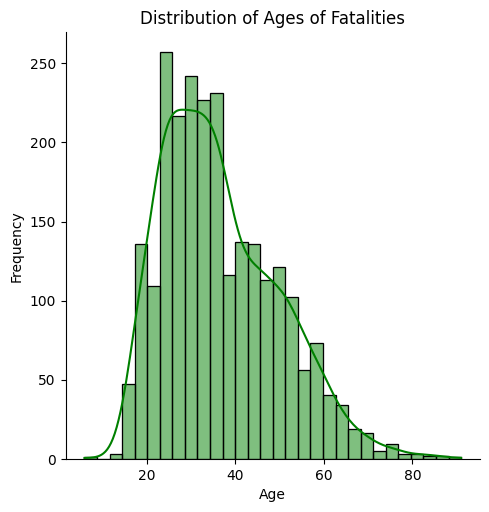

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
sns.displot(df_fatalities_cleaned['age'], kde=True, color = 'green', bins=30, kde_kws={'bw_adjust': 1})
plt.title('Distribution of Ages of Fatalities')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

<ipython-input-259-18a0e854616d>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-259-18a0e854616d>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-259-18a0e854616d>:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-259-18a0e854616d>:15: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-259-18a0e854616d>:19: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-259-18a0e854

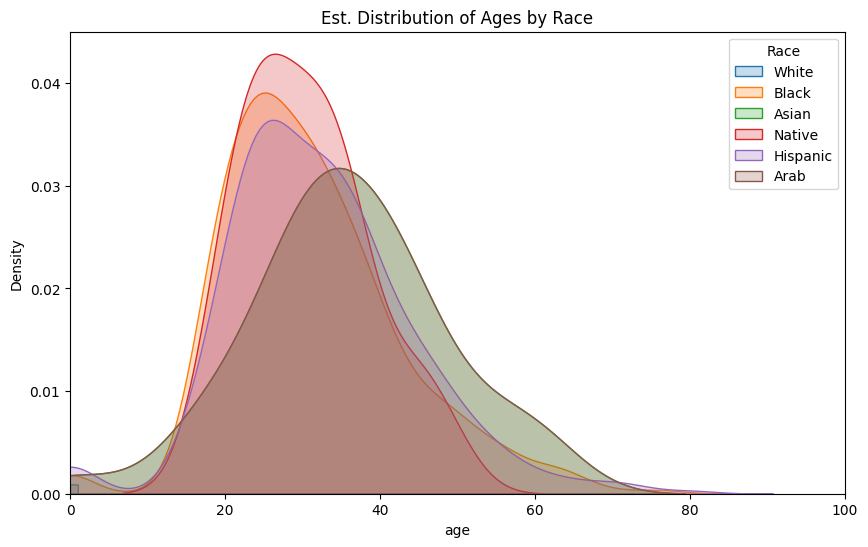

In [ ]:
plt.figure(figsize = (10, 6), dpi=100)
sns.kdeplot(df_fatalities.loc[df_fatalities.race == 'W']['age'],
            shade=True,
            label = 'White',
            clip=(0,1)
            )
sns.kdeplot(df_fatalities.loc[df_fatalities.race == 'B']['age'],
            shade=True,
            label = 'Black'
            )
sns.kdeplot(df_fatalities.loc[df_fatalities.race == 'A']['age'],
            shade=True,
            label = 'Asian'
            )
sns.kdeplot(df_fatalities.loc[df_fatalities.race == 'N']['age'],
            shade=True,
            label = 'Native'
            )
sns.kdeplot(df_fatalities.loc[df_fatalities.race == 'H']['age'],
            shade=True,
            label = 'Hispanic'
            )
sns.kdeplot(df_fatalities.loc[df_fatalities.race == 'A']['age'],
            shade=True,
            label = 'Arab'
            )
plt.title('Est. Distribution of Ages by Race')

plt.xlim(0, 100)
plt.legend(title='Race')



<ipython-input-254-00d85bd6f613>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-254-00d85bd6f613>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-254-00d85bd6f613>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-254-00d85bd6f613>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-254-00d85bd6f613>:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-254-00d85bd6f61

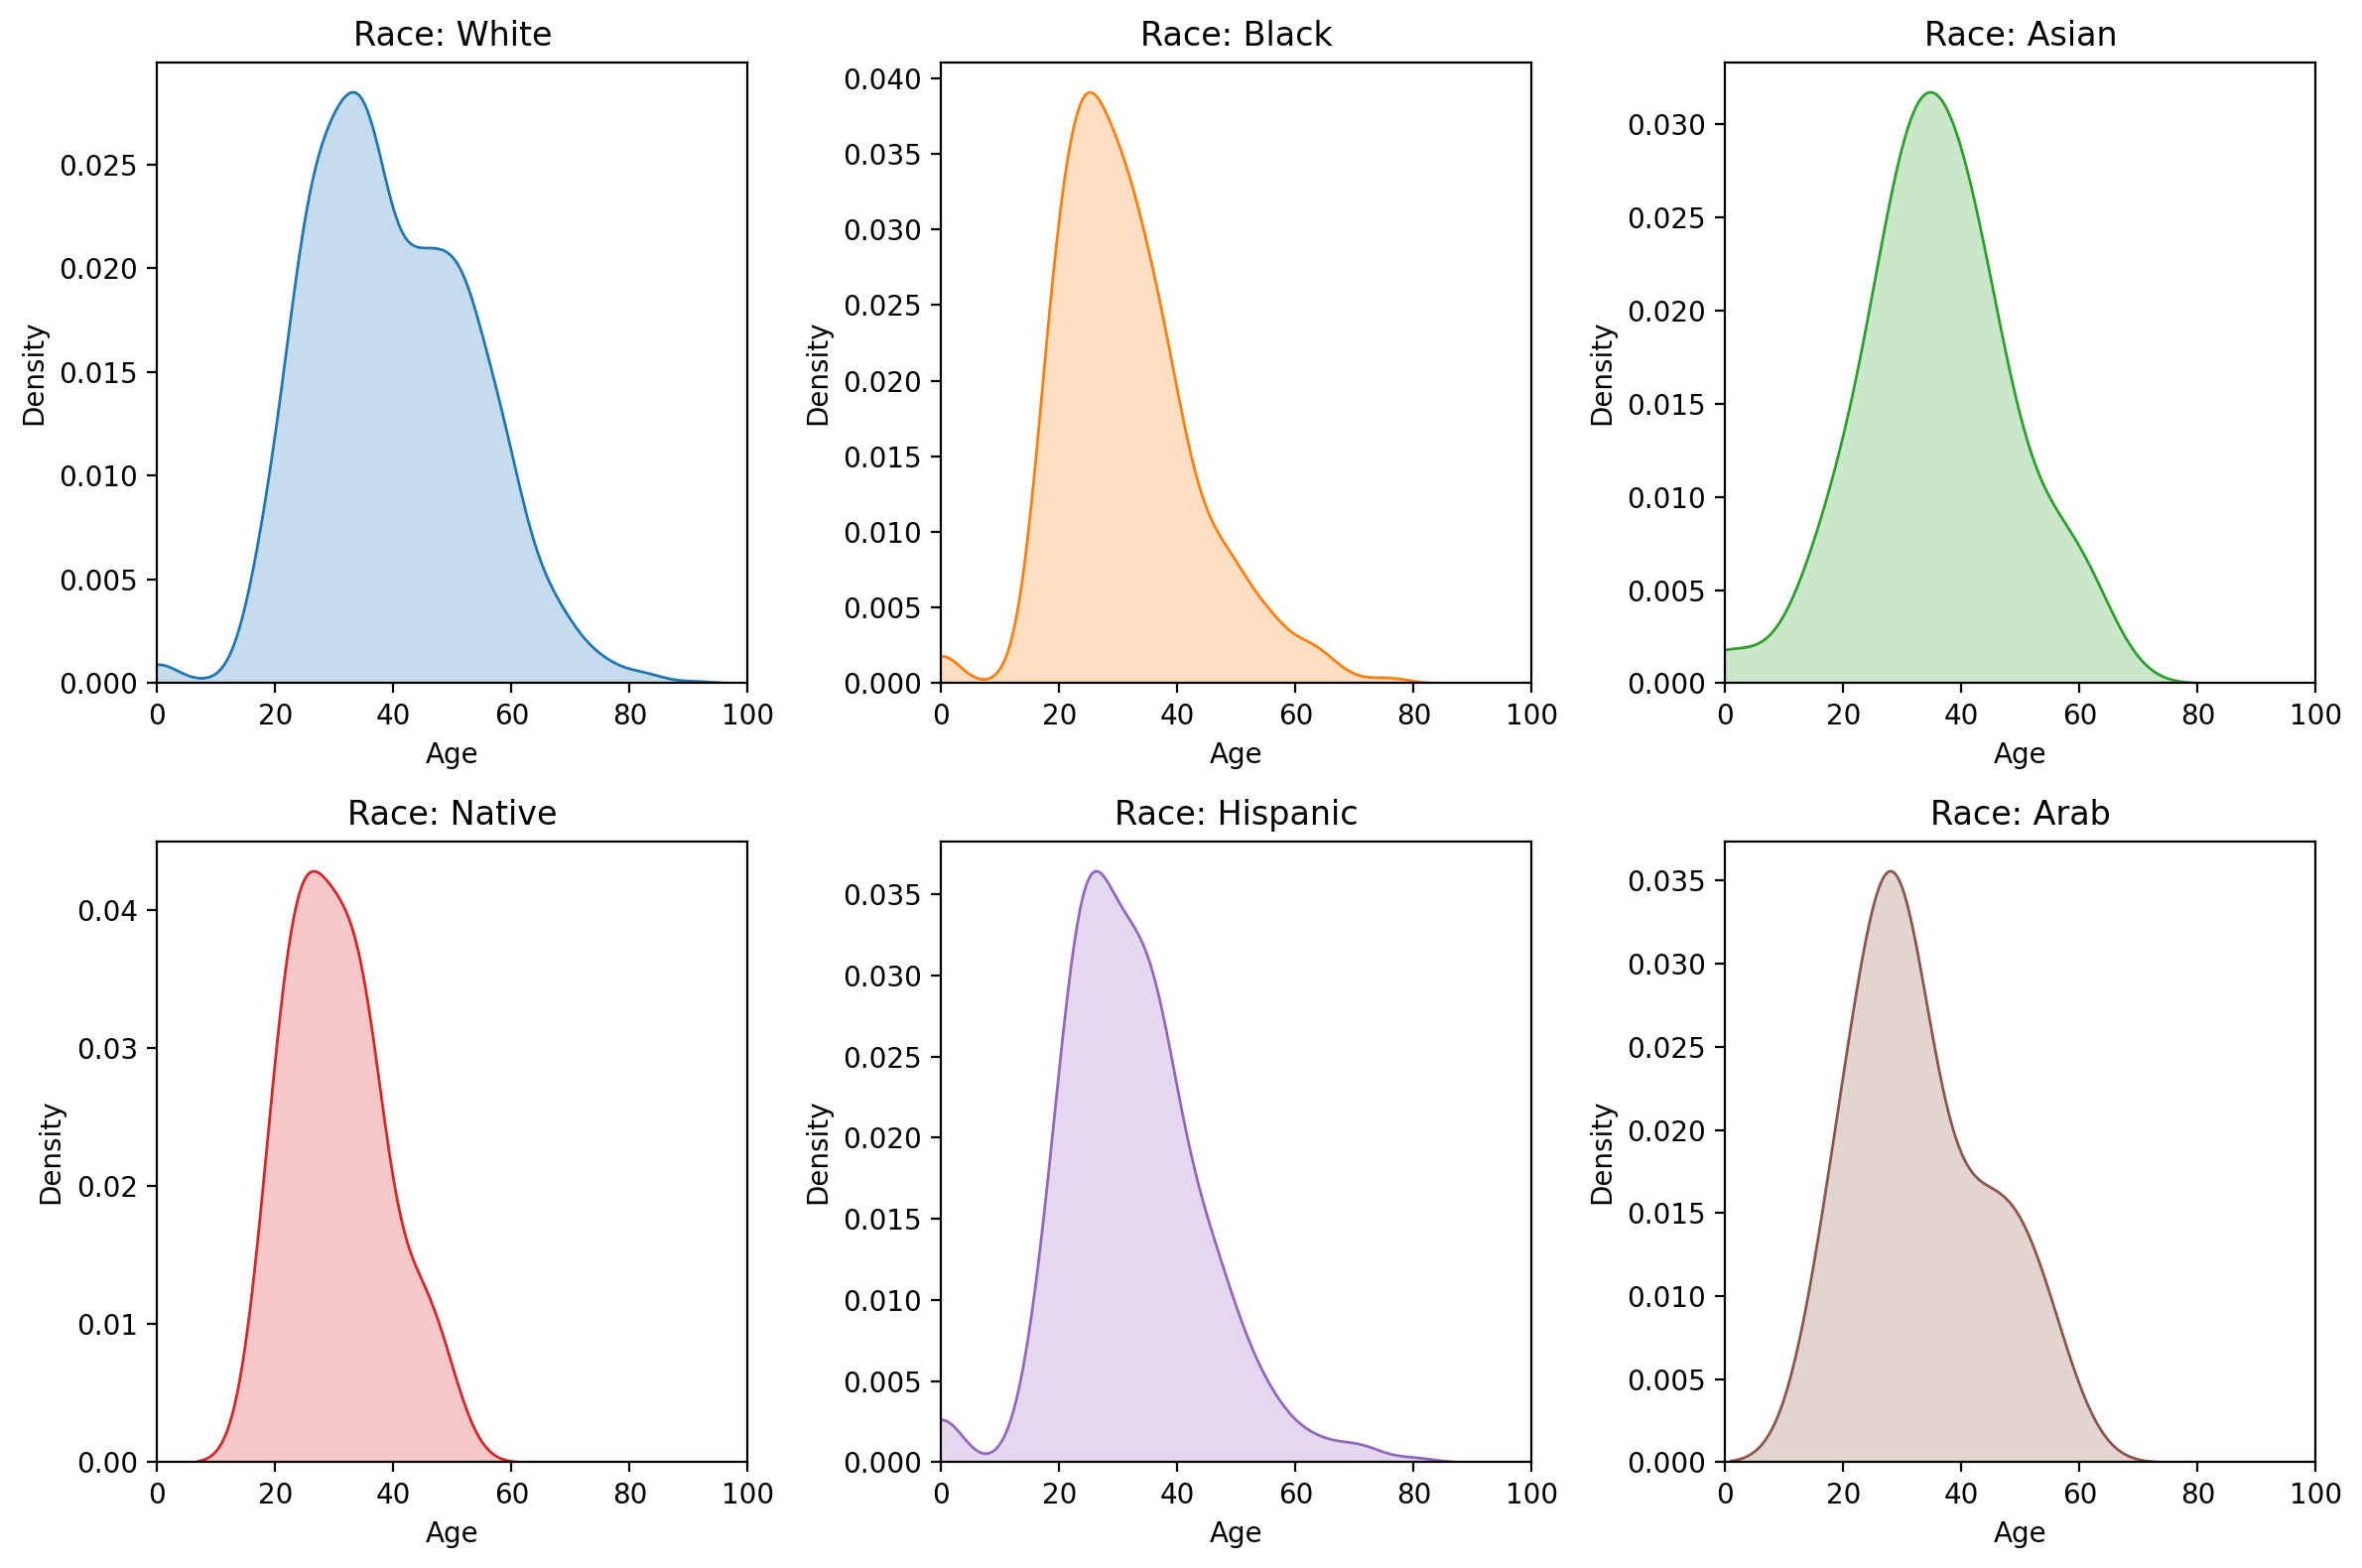

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8), dpi=200)
axs = axs.flatten()
name_of_race = ['White', 'Black', 'Asian', 'Native', 'Hispanic', 'Arab']
i=0
races = ['W', 'B', 'A', 'N', 'H', 'O']
for i, race in enumerate(races):
    sns.kdeplot(df_fatalities.loc[df_fatalities.race == race]['age'], shade=True, ax=axs[i],  color=f'C{i}')
    axs[i].set_title(f'Race: {name_of_race[i]}')
    axs[i].set_xlim(0, 100)
    axs[i].set_xlabel('Age')
    axs[i].set_ylabel('Density')
    i+=1
plt.tight_layout()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [ ]:
df_fatalities.race.value_counts()

race
W    1201
B     618
H     423
0     195
A      39
N      31
O      28
Name: count, dtype: int64

In [ ]:
killed_races = df_fatalities['race'].value_counts()
killed_races.index =['White', 'Black', 'Hispanic', 'Undefined', 'Asian', 'Native', 'Unknown']


In [ ]:
killed_races.sum()

2535

In [ ]:
h_bar = px.bar(x = killed_races.index,
               y = killed_races.values,
               color = killed_races.index,
               color_continuous_scale='Viridis',
               title='Total Number of People Killed by Race')
h_bar.update_layout(xaxis_title='Race', yaxis_title='Number', coloraxis_showscale=False)
h_bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
signs_of_mental_illness = len (df_fatalities.loc[df_fatalities.signs_of_mental_illness == True])
percentage_of_mental_illnes = signs_of_mental_illness/len(df_fatalities.signs_of_mental_illness)*100
print(f'Percentage of people killed by police have been diagnosed with a mental illness {percentage_of_mental_illnes: .2f}%')

Percentage of people killed by police have been diagnosed with a mental illness  24.97%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
top_10_cities_by_the_most_killings = df_fatalities['city'].value_counts()[:10]
top_10_cities_by_the_most_killings

city
Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: count, dtype: int64

In [ ]:
h_bar = px.bar(x = top_10_cities_by_the_most_killings.index,
               y = top_10_cities_by_the_most_killings.values,
               color = top_10_cities_by_the_most_killings.index,
               color_continuous_scale='Viridis',
               title='Top 10 Cities by The Most Killings')
h_bar.update_layout(xaxis_title='Cities', yaxis_title='Number', coloraxis_showscale=False)
h_bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [ ]:
cities = top_10_cities_by_the_most_killings.index
cities_list = cities.tolist()


In [ ]:
df_filtered_top_10_cities = df_fatalities.loc[df_fatalities['city'].isin(cities)]

In [ ]:
df_filtered_top_10_cities['race'] = df_filtered_top_10_cities['race'].replace('W', 'White')
df_filtered_top_10_cities['race'] = df_filtered_top_10_cities['race'].replace('B', 'Black')
df_filtered_top_10_cities['race'] = df_filtered_top_10_cities['race'].replace('A', 'Asian')
df_filtered_top_10_cities['race'] = df_filtered_top_10_cities['race'].replace('H', 'Hispanic')
df_filtered_top_10_cities['race'] = df_filtered_top_10_cities['race'].replace('N', 'Native')
df_filtered_top_10_cities['race'] = df_filtered_top_10_cities['race'].replace('O', 'Unknown')
df_filtered_top_10_cities['race'] = df_filtered_top_10_cities['race'].replace(0, 'Undefined')



<ipython-input-280-7810839f9b57>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-280-7810839f9b57>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-280-7810839f9b57>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-280-781

In [ ]:
df_filtered_top_10_cities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
12,22,Hashim Hanif Ibn Abdul-Rasheed,07/01/15,shot,knife,41.00,M,Black,Columbus,OH,True,other,Not fleeing,False
40,75,Pablo Meza,17/01/15,shot,gun,24.00,M,Hispanic,Los Angeles,CA,False,attack,Not fleeing,False
48,90,Isaac Holmes,21/01/15,shot,gun,19.00,M,Black,St. Louis,MO,False,attack,Not fleeing,False
52,336,Robert Francis Mesch,23/01/15,shot,gun,61.00,M,White,Austin,TX,True,attack,Not fleeing,False
64,348,Nicolas Leland Tewa,27/01/15,shot,vehicle,26.00,M,Native,Phoenix,AZ,False,other,Not fleeing,False


In [ ]:
share_of_each_race = df_filtered_top_10_cities.groupby(['city','race'], as_index=False).agg({'gender':pd.Series.count})
share_of_each_race.columns = ['city', 'race', 'number_of_race']
total_people = share_of_each_race[['city', 'number_of_race']].groupby('city', as_index=False).sum()
total_people.columns = ['city', 'total_number']

In [ ]:
total_people.head()

,city,total_number
0,Austin,18
1,Chicago,25
2,Columbus,19
3,Houston,27
4,Las Vegas,21


In [ ]:
merged_top_10_cities = pd.merge(share_of_each_race, total_people, on='city')
merged_top_10_cities['pct_number'] = merged_top_10_cities.number_of_race/merged_top_10_cities.total_number*100

In [ ]:
merged_top_10_cities

,city,race,number_of_race,total_number,pct_number
0,Austin,Black,3,18,16.67
1,Austin,Hispanic,2,18,11.11
2,Austin,White,13,18,72.22
3,Chicago,Black,21,25,84.00
4,Chicago,Hispanic,1,25,4.00
5,Chicago,Undefined,1,25,4.00
6,Chicago,White,2,25,8.00
7,Columbus,Black,11,19,57.89
8,Columbus,Undefined,1,19,5.26
9,Columbus,Unknown,1,19,5.26


In [ ]:
merged_top_10_cities.sort_values('total_number', ascending = False, inplace = True)

In [ ]:
v_bar_split = px.bar(x = merged_top_10_cities.city,
                     y = merged_top_10_cities.pct_number,
                     color = merged_top_10_cities.race,
                     title='Top 10 Cities')

v_bar_split.update_layout(xaxis_title='Cities',
                          yaxis_title='Percentage of Races of Eache City')
v_bar_split.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
df_pct_poverty.count()

Geographic Area    29329
City               29329
poverty_rate       29329
dtype: int64

In [ ]:
df_pct_poverty_clean = df_pct_poverty[(df_pct_poverty.poverty_rate !='-') & (df_pct_poverty.poverty_rate !='0')]
df_pct_poverty_clean.count()

Geographic Area    27664
City               27664
poverty_rate       27664
dtype: int64

In [ ]:
df_pct_poverty_clean['poverty_rate'] = pd.to_numeric(df_pct_poverty_clean['poverty_rate'])


<ipython-input-12-e6b6f13e7a89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pct_poverty_clean['poverty_rate'] = pd.to_numeric(df_pct_poverty_clean['poverty_rate'])


In [ ]:
def iso_to_full_name(iso_name):
    return us.states.lookup(iso_name).name if us.states.lookup(iso_name) else None
df_pct_poverty_new = df_pct_poverty_clean.groupby('Geographic Area', as_index=False).agg({'poverty_rate':pd.Series.mean})
df_pct_poverty_new['State_Name'] = df_pct_poverty_new['Geographic Area'].apply(iso_to_full_name)
df_pct_poverty_new.loc[df_pct_poverty_new['Geographic Area'].str.contains('DC'), 'State_Name'] ='Washington DC'
df_pct_poverty_new.head()

,Geographic Area,poverty_rate,State_Name
0,AK,22.48,Alaska
1,AL,21.53,Alabama
2,AR,23.75,Arkansas
3,AZ,28.42,Arizona
4,CA,18.43,California


In [ ]:
def iso_to_full_name(iso_name):
    return us.states.lookup(iso_name).name if us.states.lookup(iso_name) else None

df_map_of_state = df_fatalities.groupby('state', as_index=False).agg({'gender':pd.Series.count})
df_map_of_state.columns = ['Geographic_Area', 'Number_of_Killings']
df_map_of_state['State_Name'] = df_map_of_state['Geographic_Area'].apply(iso_to_full_name)
df_map_of_state.loc[df_map_of_state['Geographic_Area'].str.contains('DC'), 'State_Name'] ='Washington DC'
df_map_of_state.sort_values('Number_of_Killings', ascending=False, inplace = True)
df_map_of_state.count()

Geographic_Area       51
Number_of_Killings    51
State_Name            51
dtype: int64

In [ ]:

map_USA_1 = px.choropleth(df_map_of_state,
                         locations='Geographic_Area',
                         locationmode='USA-states',
                         color='Number_of_Killings',
                         scope='usa',
                         hover_name='State_Name',
                         color_continuous_scale=px.colors.sequential.matter
                         )
map_USA_2 = px.choropleth(df_pct_poverty_new,
                         locations='Geographic Area',
                         locationmode='USA-states',
                         color='poverty_rate',
                         scope='usa',
                         hover_name='State_Name',
                         color_continuous_scale=px.colors.sequential.matter
                         )

map_USA_1.update_layout(
    title_text="Number of Killings by Police in Each US State (Map 1)",
    title_font_size=20,
    title_font_color="darkblue",
    coloraxis_showscale=True
)

map_USA_2.update_layout(
    title_text="Average Poverty in Each US state (Map 2)",
    title_font_size=20,
    title_font_color="darkblue",
    coloraxis_showscale=True
)


map_USA_1.show()
map_USA_2.show()

# Epilogue - Number of Police Killings Over Time

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/)





In [ ]:
df_fatal_police_shootings.race.value_counts()

race
W        4201
B        2201
H        1495
A         164
N         125
O          28
W;B;N       1
N;H         1
W;H         1
B;H         1
W;B         1
Name: count, dtype: int64

In [ ]:
df_fatal_police_shootings.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.25,-123.12,not_available,Tim Elliot,53.00,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.49,-122.89,not_available,Lewis Lee Lembke,47.00,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.69,-97.28,not_available,John Paul Quintero,23.00,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.76,-122.42,not_available,Matthew Hoffman,32.00,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.38,-104.69,not_available,Michael Rodriguez,39.00,male,H,not_available,False,False,473


In [ ]:
df_fatal_police_shootings.isna().any(axis=0)

id                            False
date                          False
threat_type                    True
flee_status                    True
armed_with                     True
city                           True
county                         True
state                         False
latitude                       True
longitude                      True
location_precision             True
name                           True
age                            True
gender                         True
race                           True
race_source                    True
was_mental_illness_related    False
body_camera                   False
agency_ids                    False
dtype: bool

In [ ]:
df_fatal_police_shootings.date = pd.to_datetime(df_fatal_police_shootings.date)
df_fatal_police_shootings['year'] = df_fatal_police_shootings['date'].dt.year

In [ ]:
df_killing_over_time = df_fatal_police_shootings.groupby('year', as_index=False)['age'].count()
df_killing_over_time.columns = ['year', 'number_of_killings']


In [ ]:
df_killing_over_time.sort_values('year', ascending=True, inplace = True)
df_killing_over_time

,year,number_of_killings
0,2015,992
1,2016,948
2,2017,961
3,2018,952
4,2019,945
5,2020,977
6,2021,984
7,2022,1022
8,2023,1093
9,2024,130


In [ ]:
bar = px.bar(x=df_killing_over_time.year, y= df_killing_over_time.number_of_killings, title = 'Number of Killings Over Time', color=df_killing_over_time.number_of_killings, color_continuous_scale='Aggrnyl')
bar.update_layout(xaxis_title='Years',
                  coloraxis_showscale=False,
                  yaxis_title='Number of Killings'
                  )
bar.show()

## **Population between 1910-2020**

In [ ]:
df_1910_2020 = pd.read_csv('apportionment.csv')

In [ ]:
df_poverty_change_pct = pd.read_csv('poverty_pct - hstpov19.csv')

In [ ]:
df_1910_2020['Geography Type']

0       State
1       State
2       State
3       State
4       State
        ...  
679    Region
680    Region
681    Region
682    Region
683    Nation
Name: Geography Type, Length: 684, dtype: object

In [ ]:
df_1910_2020['Resident Population'] = df_1910_2020['Resident Population'].str.replace(',', '')
df_1910_2020['Resident Population'] = pd.to_numeric(df_1910_2020['Resident Population'])

In [ ]:
df_1910_2020_US = df_1910_2020.loc[df_1910_2020['Geography Type'] == 'Nation']


In [ ]:
df_poverty_change_pct = df_poverty_change_pct.loc[df_poverty_change_pct['State'].isin(df_top_10_countries_by_population['Name'])]

In [ ]:
df_top_10_countries_by_population = df_1910_2020.loc[df_1910_2020.Name.isin(df_1910_2020.loc[(df_1910_2020['Geography Type']!='Region')&(df_1910_2020['Geography Type'] != 'Nation')&(df_1910_2020.Year == 2020)].sort_values('Resident Population', ascending = False)[:10]['Name'])]
df_top_10_countries_by_population

,Name,Geography Type,Year,Resident Population,Percent Change in Resident Population,Resident Population Density,Resident Population Density Rank,Number of Representatives,Change in Number of Representatives,Average Apportionment Population Per Representative
4,California,State,1910,2377549,60.10,15.3,38.00,11.00,3.00,"216,051"
9,Florida,State,1910,752619,42.40,14,40.00,4.00,1.00,"188,155"
10,Georgia,State,1910,2609121,17.70,45.4,23.00,12.00,1.00,"217,427"
13,Illinois,State,1910,5638591,16.90,101.6,12.00,27.00,2.00,"208,837"
22,Michigan,State,1910,2810173,16.10,49.7,19.00,13.00,1.00,"216,167"
...,...,...,...,...,...,...,...,...,...,...
659,New York,State,2020,20201249,4.20,428.7,9.00,26.00,-1.00,"777,529"
660,North Carolina,State,2020,10439388,9.50,214.7,17.00,14.00,1.00,"746,711"
662,Ohio,State,2020,11799448,2.30,288.8,12.00,15.00,-1.00,"787,257"
665,Pennsylvania,State,2020,13002700,2.40,290.6,11.00,17.00,-1.00,"765,403"


In [ ]:
line1 = px.line (df_top_10_countries_by_population,
                x='Year',
                y='Resident Population',
                color = 'Name',
                markers = True,
                hover_data = 'Percent Change in Resident Population',
                title = 'Population Change in the top 10 the most Populous States')
line1.update_layout(xaxis=dict(tickmode='linear', dtick=10))

line2 = px.line (df_1910_2020_US,
                x='Year',
                y='Resident Population',
                color = 'Name',
                markers = True,
                hover_data = 'Percent Change in Resident Population',
                title = 'United States Population 1910-2020')
line2.update_layout(xaxis=dict(tickmode='linear', dtick=10))

line3 = px.line (df_poverty_change_pct,
                x='Year',
                y='Percent in poverty',
                color = 'State',
                markers = True,
                hover_data = ['Number in poverty'],
                title = 'Poverty between 2010-2020')
line3.update_layout(xaxis=dict(tickmode='linear', dtick=1),
                    xaxis_range=[2005, 2022])

line1.show()
line3.show()
line2.show()

## **Unemployment Rate, Inflation and Population Growth over time in US**







In [7]:
unemployment_rate_US = pd.read_csv('Unemployment_Rate.csv')
unemployment_rate_US.columns=['Date', 'Unemployment Rate', 'Annual GDP Growth', 'Inflation', 'Notable Events']
population_growth_US = pd.read_csv('PopulationGrowth.csv')
population_growth_US.columns = ['Date', 'Population Growth']
total_population_US= pd.read_csv('TotalPopulationUS.csv')
total_population_US.columns = ['Date', 'Population']

In [8]:
unemployment_rate_US.fillna(0, inplace = True)

In [9]:
total_population_US['Date'] = pd.to_datetime(total_population_US['Date'])

In [10]:
total_population_US = total_population_US.loc[total_population_US['Date'].dt.month == 1]

In [11]:
total_population_US['Date'] = total_population_US['Date'].dt.year


In [12]:
total_population_US.head()

,Date,Population
0,1959,175818.0
12,1960,178925.0
24,1961,182404.0
36,1962,185347.0
48,1963,188113.0


In [13]:
population_growth_US['Date'] = pd.to_datetime(population_growth_US['Date'])

In [14]:
population_growth_US['Date'] = population_growth_US['Date'].dt.year

In [15]:
population_growth_US['Date'] = population_growth_US['Date']-1
population_growth_US.tail()

,Date,Population Growth
57,2017,0.526435
58,2018,0.455381
59,2019,0.964348
60,2020,0.156747
61,2021,0.377565


In [16]:
US_Statistics = pd.merge(unemployment_rate_US, population_growth_US, on='Date')


In [17]:
US_Statistics['Unemployment Rate'] = US_Statistics['Unemployment Rate'].str.replace('%', '')
US_Statistics['Unemployment Rate']=pd.to_numeric(US_Statistics['Unemployment Rate'])
US_Statistics['Annual GDP Growth'] = US_Statistics['Annual GDP Growth'].str.replace('%', '')
US_Statistics['Annual GDP Growth']=pd.to_numeric(US_Statistics['Annual GDP Growth'])
US_Statistics['Inflation'] = US_Statistics['Inflation'].str.replace('%', '')
US_Statistics['Inflation']=pd.to_numeric(US_Statistics['Inflation'])


In [18]:
colors = ['blue', 'green', 'red', 'purple']
figures = []

for i, col in enumerate(['Unemployment Rate', 'Annual GDP Growth', 'Inflation', 'Population Growth']):
    figure = go.Figure()
    figure.add_trace(go.Scatter(x=US_Statistics['Date'], y=US_Statistics[col], mode='lines', hoverinfo='x+y+text', text=US_Statistics['Notable Events'], name=col, line=dict(color=colors[i])))
    figure.update_layout(title=f'{col}', xaxis=dict(title='Year', dtick=1, color=colors[i], tickfont=dict(size=11), tickangle=45), yaxis=dict(title='Percent', color = colors[i], tickfont=dict(size=15)))
    figures.append(figure)

for fig in figures:
    fig.show()

In [19]:
US_Statistics.set_index('Date', inplace=True)

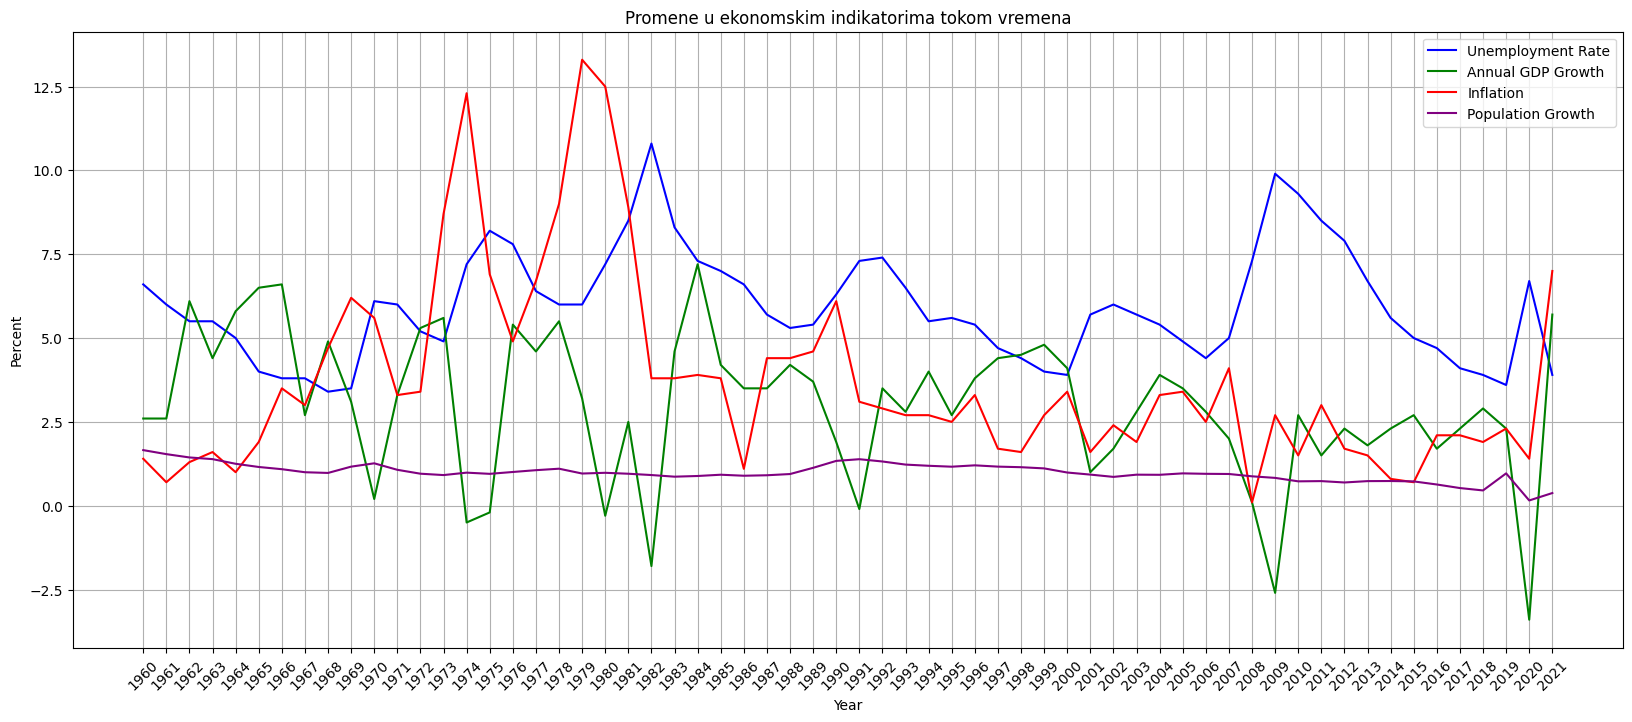

In [20]:
colors = ['blue', 'green', 'red', 'purple']
styles = ['-', '-', '-', '-']

ax = US_Statistics.plot(kind='line', figsize=(20, 8), color=colors, style=styles)
plt.title('Promene u ekonomskim indikatorima tokom vremena')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.grid(True)
plt.legend(loc='best')
years = US_Statistics.index
ax.set_xticks(np.arange(min(years), max(years)+1, 1))
plt.xticks(rotation=45)

plt.show()


In [21]:
US_Statistics.reset_index(inplace=True)

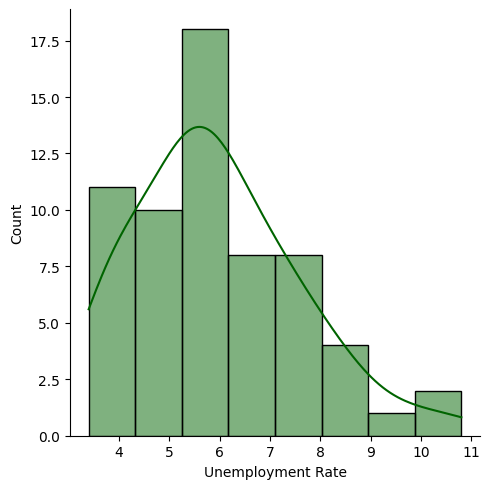

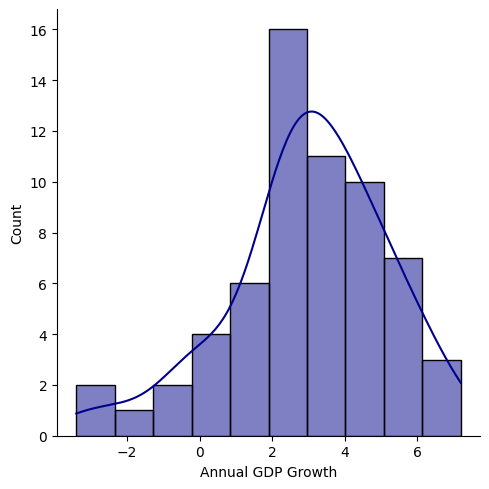

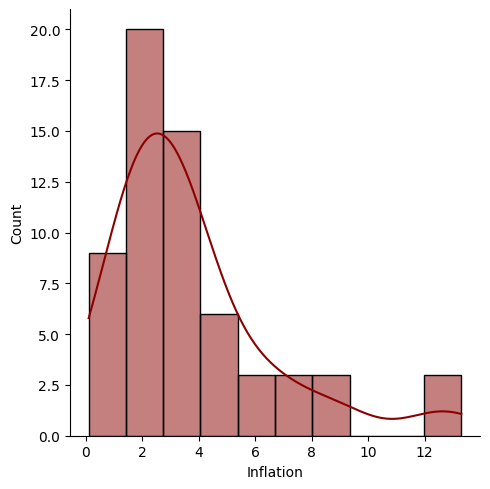

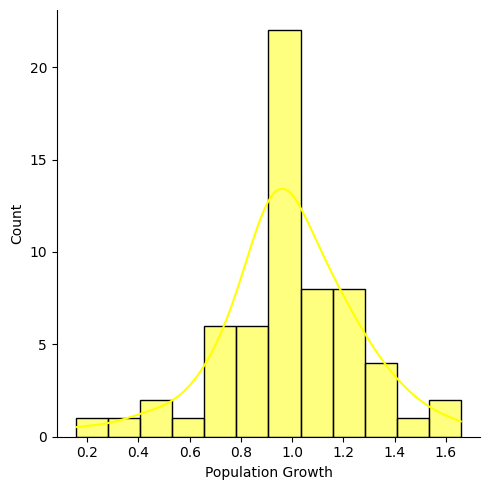

In [22]:
figures = []
colors = ['darkgreen', 'darkblue', 'darkred', 'yellow']
for i, col in enumerate(['Unemployment Rate', 'Annual GDP Growth', 'Inflation', 'Population Growth']):
    figure = sns.displot(data=US_Statistics[col], color=colors[i], aspect = 1, kde = True)
    figure.set(xlabel=col, ylabel='Count')
    figures.append(figure)

for fig in figures:
    plt.show(fig)

In [23]:
X3 = US_Statistics[['Unemployment Rate', 'Annual GDP Growth', 'Population Growth']]
y3 = np.log(US_Statistics['Inflation'])
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

scaler3 = StandardScaler()
X_train_scaled3 = scaler3.fit_transform(X_train3)
X_test_scaled3 = scaler3.transform(X_test3)

model3 = RandomForestRegressor(random_state=42)
model3.fit(X_train_scaled3, y_train3)
y_pred3 = model3.predict(X_test_scaled3)

mse3 = mean_squared_error(y_test3, y_pred3)
rsquared3 = model3.score(X_train_scaled3, y_train3)

print(f'Rsquared: {rsquared3:.3f}')
print(f'MSE: {mse3:.3f}')
comparison_df3 = pd.DataFrame({'Stvarne vrednosti': np.exp(y_test3), 'Predviđene vrednosti': np.exp(y_pred3), 'Razlika': abs(np.exp(y_test3)-np.exp(y_pred3))})
print(comparison_df3)
comparison_df3['Predviđene vrednosti'][comparison_df3['Razlika'].idxmin()]

Rsquared: 0.908
MSE: 1.063
    Stvarne vrednosti  Predviđene vrednosti   Razlika
50                1.5              1.972349  0.472349
56                2.1              1.328953  0.771047
0                 1.4              1.404499  0.004499
57                2.1              1.513331  0.586669
5                 1.9              2.215820  0.315820
48                0.1              3.021023  2.921023
16                4.9              6.730696  1.830696
12                3.4              5.779773  2.379773
25                3.8              4.417973  0.617973
59                2.3              3.115839  0.815839
30                6.1              2.889901  3.210099
9                 6.2              2.865999  3.334001
47                4.1              2.817387  1.282613


1.4044991143337122

In [24]:
US_Statistics.tail(5)

,Date,Unemployment Rate,Annual GDP Growth,Inflation,Notable Events,Population Growth
57,2017,4.1,2.3,2.1,Dollar weakened,0.526435
58,2018,3.9,2.9,1.9,Trump tax cuts,0.455381
59,2019,3.6,2.3,2.3,Goldilocks economy,0.964348
60,2020,6.7,-3.4,1.4,COVID-19 pandemic and recession,0.156747
61,2021,3.9,5.7,7.0,COVID-19 pandemic and recovery,0.377565


In [25]:
Kopija= US_Statistics.copy()
Kopija.count()

Date                 62
Unemployment Rate    62
Annual GDP Growth    62
Inflation            62
Notable Events       62
Population Growth    62
dtype: int64

In [26]:
def linear_reg1(data):
    X1 = data[['Annual GDP Growth', 'Inflation', 'Population Growth']]
    y1 = np.log(data['Unemployment Rate'])
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=10)
    scaler1 = StandardScaler()
    X_train_scaled1 = scaler1.fit_transform(X_train1)
    X_test_scaled1 = scaler1.transform(X_test1)

    model1 = RandomForestRegressor(random_state=10)
    model1.fit(X_train_scaled1, y_train1)
    y_pred1 = model1.predict(X_test_scaled1)

    mse1 = mean_squared_error(y_test1, y_pred1)
    rsquared1 = model1.score(X_train_scaled1, y_train1)
    return model1, X1, y_pred1

def linear_reg2(data):
    X2 = data[['Unemployment Rate', 'Inflation', 'Population Growth']]
    y2 = (data['Annual GDP Growth'])
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=10)

    scaler2 = StandardScaler()
    X_train_scaled2 = scaler2.fit_transform(X_train2)
    X_test_scaled2 = scaler2.transform(X_test2)

    model2 = RandomForestRegressor(random_state=10)
    model2.fit(X_train_scaled2, y_train2)
    y_pred2 = model2.predict(X_test_scaled2)

    mse2 = mean_squared_error(y_test2, y_pred2)
    rsquared2 = model2.score(X_train_scaled2, y_train2)
    return model2, X2, y_pred2

def linear_reg3(data):
    X3 = data[['Unemployment Rate', 'Annual GDP Growth', 'Population Growth']]
    y3 = np.log(data['Inflation'])
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=10)

    scaler3 = StandardScaler()
    X_train_scaled3 = scaler3.fit_transform(X_train3)
    X_test_scaled3 = scaler3.transform(X_test3)

    model3 = RandomForestRegressor(random_state=10)
    model3.fit(X_train_scaled3, y_train3)
    y_pred3 = model3.predict(X_test_scaled3)

    mse3 = mean_squared_error(y_test3, y_pred3)
    rsquared3 = model3.score(X_train_scaled3, y_train3)
    return model3, X3, y_pred3

def linear_reg4(data):
    X4 = data[['Unemployment Rate', 'Annual GDP Growth', 'Inflation']]
    y4 = np.log(data['Population Growth'])
    X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=10)

    scaler4 = StandardScaler()
    X_train_scaled4 = scaler4.fit_transform(X_train4)
    X_test_scaled4 = scaler4.transform(X_test4)

    model4 = RandomForestRegressor(random_state=10)
    model4.fit(X_train_scaled4, y_train4)
    y_pred4 = model4.predict(X_test_scaled4)

    mse4 = mean_squared_error(y_test4, y_pred4)
    rsquared4 = model4.score(X_train_scaled4, y_train4)

    return model4, X4, y_pred4

for i in range(9):

  model1, X1, y_pred1 = linear_reg1(Kopija)
  model2, X2, y_pred2 = linear_reg2(Kopija)
  model3, X3, y_pred3 = linear_reg3(Kopija)
  model4, X4, y_pred4 = linear_reg4(Kopija)

  result11 = y_pred1[0]
  result2 = y_pred2[0]
  result33 = y_pred3[0]
  result44 = y_pred4[0]
  result1=np.exp(result11)
  result3=np.exp(result33)
  result4=np.exp(result44)

  last_date = Kopija['Date'].iloc[-1]
  result5 = last_date + 1
  result6 = 'Prediction Only'

  new_row_values = [ result5, result1, result2, result3, result6, result4]
  Kopija.loc[len(Kopija)] = new_row_values

Kopija.tail(15)

,Date,Unemployment Rate,Annual GDP Growth,Inflation,Notable Events,Population Growth
56,2016,4.700000,1.700000,2.100000,Presidential race,0.632644
57,2017,4.100000,2.300000,2.100000,Dollar weakened,0.526435
58,2018,3.900000,2.900000,1.900000,Trump tax cuts,0.455381
59,2019,3.600000,2.300000,2.300000,Goldilocks economy,0.964348
60,2020,6.700000,-3.400000,1.400000,COVID-19 pandemic and recession,0.156747
61,2021,3.900000,5.700000,7.000000,COVID-19 pandemic and recovery,0.377565
62,2022,7.536045,0.814000,6.511787,Prediction Only,0.978618
63,2023,7.622061,0.577400,6.492022,Prediction Only,0.984623
64,2024,7.586617,1.034690,5.707688,Prediction Only,1.027771
65,2025,7.406750,0.765388,7.920975,Prediction Only,1.005841


In [ ]:
Kopija.set_index('Date', inplace=True)

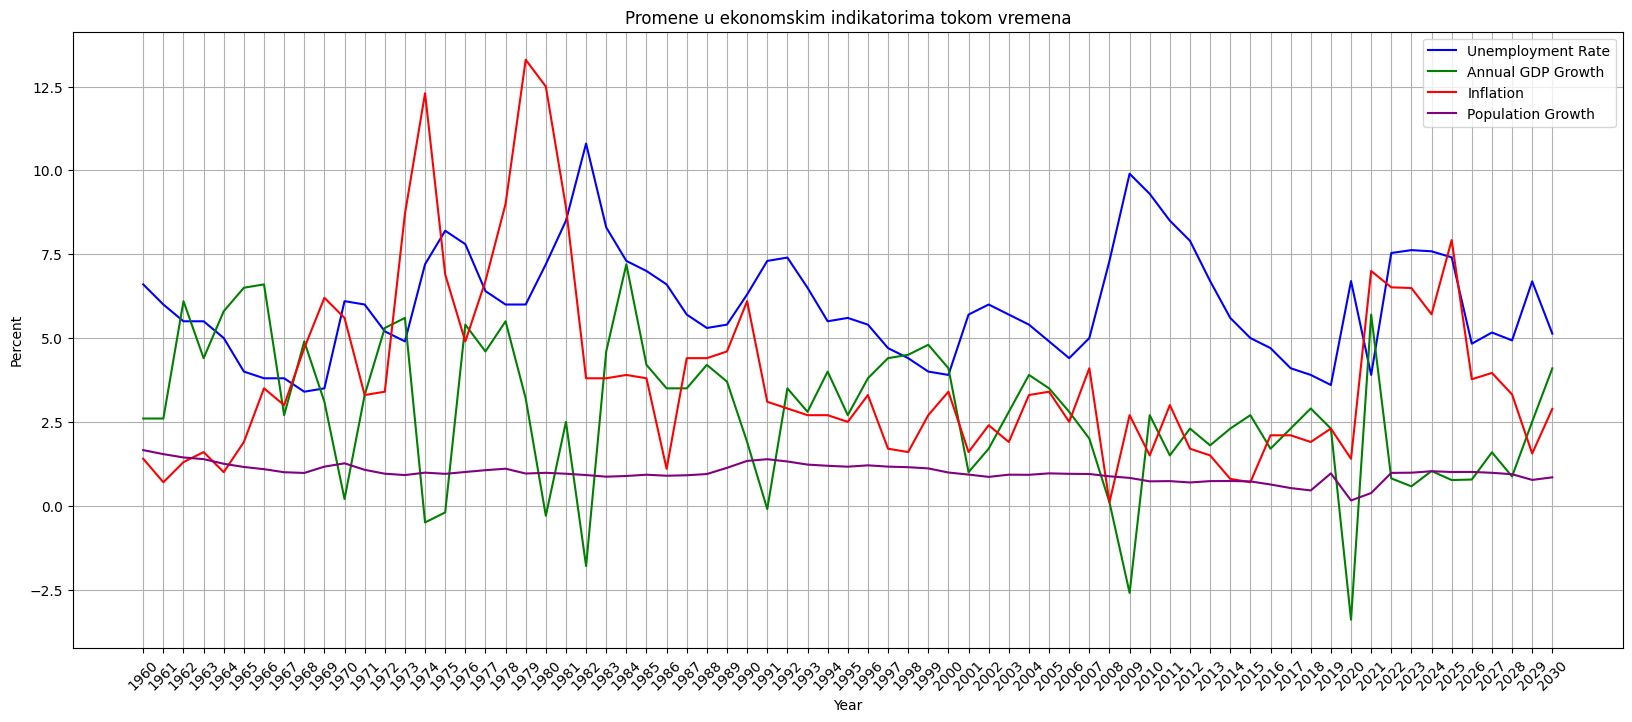

In [30]:
colors = ['blue', 'green', 'red', 'purple']
styles = ['-', '-', '-', '-']

ax = Kopija.plot(kind='line', figsize=(20, 8), color=colors, style=styles)
plt.title('Promene u ekonomskim indikatorima tokom vremena')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.grid(True)
plt.legend(loc='best')
years = Kopija.index
ax.set_xticks(np.arange(min(years), max(years)+1, 1))
plt.xticks(rotation=45)

plt.show()


In [ ]:
Kopija.reset_index(inplace=True)

In [ ]:
Kopija.drop('index', axis=1, inplace=True)
